### 1. Initializing

#### 1.1. Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras as ks
from sklearn.model_selection import train_test_split

### 2. Construct a data set (Images) for each visual objects (100 Object at least) 

In [ ]:
(training_images, training_labels), (test_images, test_labels) = ks.datasets.cifar100.load_data(label_mode='fine')

training_images, validation_images, training_labels, validation_labels = train_test_split(training_images, training_labels, train_size=0.8)

# Shape of Training and Test Set
print('Training Dataset Shape: {}'.format(training_images.shape))
print('No. of Training Dataset Labels: {}'.format(len(training_labels)))
print('Test Dataset Shape: {}'.format(test_images.shape))
print('No. of Test Dataset Labels: {}'.format(len(test_labels)))
print('Validation Dataset Shape: {}'.format(validation_images.shape))
print('No. of Validation Dataset Labels: {}'.format(len(validation_labels)))


Training Dataset Shape: (40000, 32, 32, 3)
No. of Training Dataset Labels: 40000
Test Dataset Shape: (10000, 32, 32, 3)
No. of Test Dataset Labels: 10000
Validation Dataset Shape: (10000, 32, 32, 3)
No. of Validation Dataset Labels: 10000


### 3. CNN (Feature Extraction + Classification)

#### 3.1. Model Building

In [ ]:
# Create the base model from the pre-trained model VGG16
preprocess_input = ks.applications.vgg16.preprocess_input
base_model = ks.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3), pooling='avg')

for layer in base_model.layers:
    layer.trainable = False

base_model.trainable = False

# add last layers
hidden_layer1 = ks.layers.Dense(2048, activation='relu'   , name='Hidden_layer1')
hidden_layer2 = ks.layers.Dense(2048, activation='relu'   , name='Hidden_layer2')
hidden_layer3 = ks.layers.Dense(2048, activation='relu'   , name='Hidden_layer3')
hidden_layer4 = ks.layers.Dense(2048, activation='relu'   , name='Hidden_layer4')
hidden_layer5 = ks.layers.Dense(2048, activation='relu'   , name='hidden_layer5')
hidden_layer6 = ks.layers.Dense(2048, activation='relu'   , name='hidden_layer6')
hidden_layerf = ks.layers.Dense( 100, activation='relu'   , name='Hidden_layerf')
output_layer  = ks.layers.Dense( 100, activation='softmax', name='Output_layer')
normali_layer = ks.layers.BatchNormalization()
dropout_layer = ks.layers.Dropout(0.2)
flatten_layer = ks.layers.Flatten()
data_augmentation = ks.Sequential([
    ks.layers.experimental.preprocessing.RandomFlip('horizontal'),
    #ks.layers.experimental.preprocessing.RandomRotation(0.2),
])

# Marge all steps:
inputs  = ks.Input(shape=(32, 32, 3))
outputs = data_augmentation(inputs)
outputs = preprocess_input(outputs)
outputs = base_model(outputs, training=False)
outputs = flatten_layer(outputs)
outputs =              (normali_layer(hidden_layer1(outputs)))
outputs = dropout_layer(normali_layer(hidden_layer2(outputs)))
#outputs =              (normali_layer(hidden_layer3(outputs)))
#outputs = dropout_layer(normali_layer(hidden_layer4(outputs)))
#outputs =              (normali_layer(hidden_layer5(outputs)))
#outputs = dropout_layer(normali_layer(hidden_layer6(outputs)))
outputs = hidden_layerf(outputs)
outputs = output_layer(outputs)

cnn_model = ks.Model(inputs, outputs)
cnn_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 sequential_1 (Sequential)      (None, 32, 32, 3)    0           ['input_4[0][0]']                
                                                                                                  
 tf.__operators__.getitem_1 (Sl  (None, 32, 32, 3)   0           ['sequential_1[0][0]']           
 icingOpLambda)                                                                                   
                                                                                                  
 tf.nn.bias_add_1 (TFOpLambda)  (None, 32, 32, 3)    0           ['tf.__operators__.getitem_

#### 3.2. Optimization function

In [ ]:
cnn_model.compile(optimizer=ks.optimizers.Adam(learning_rate=0.001),
                  loss=ks.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

#### 3.3. Model Training

In [ ]:
history = cnn_model.fit(x=training_images,
                        y=training_labels,
                        epochs=30,
                        batch_size=32,
                        validation_data=(validation_images, validation_labels))

Epoch 1/30
1250/1250 [==============================] - 454s 358ms/step - loss: 3.1082 - accuracy: 0.2651 - val_loss: 2.9838 - val_accuracy: 0.2932
Epoch 2/30
1250/1250 [==============================] - 443s 354ms/step - loss: 2.4413 - accuracy: 0.3661 - val_loss: 2.8927 - val_accuracy: 0.3113
Epoch 3/30
1250/1250 [==============================] - 437s 349ms/step - loss: 2.1964 - accuracy: 0.4135 - val_loss: 2.6669 - val_accuracy: 0.3446
Epoch 4/30
1250/1250 [==============================] - 434s 347ms/step - loss: 1.9919 - accuracy: 0.4541 - val_loss: 2.6604 - val_accuracy: 0.3501
Epoch 5/30
1250/1250 [==============================] - 496s 397ms/step - loss: 1.8123 - accuracy: 0.4960 - val_loss: 2.7002 - val_accuracy: 0.3540
Epoch 6/30
1250/1250 [==============================] - 695s 557ms/step - loss: 1.6270 - accuracy: 0.5387 - val_loss: 2.6855 - val_accuracy: 0.3460
Epoch 7/30
1250/1250 [==============================] - 409s 327ms/step - loss: 1.4528 - accuracy: 0.5762 - val_

KeyboardInterrupt: 

#### 3.4. Model Evaluation

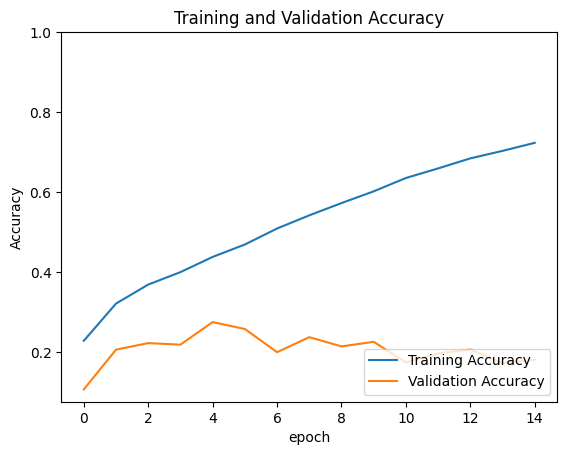

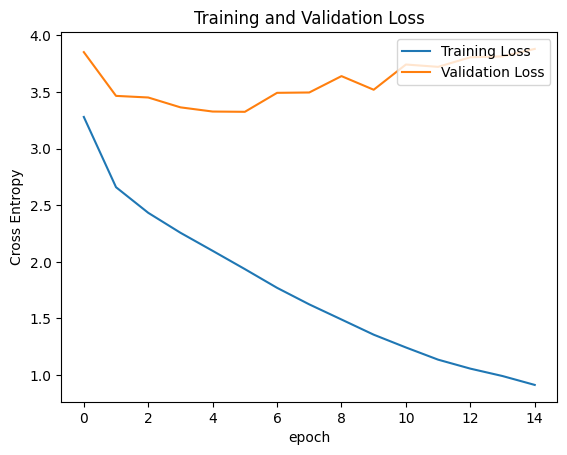

In [ ]:
# Testing Evaluation
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)
print('Test Accuracy {}'.format(round(float(test_accuracy), 2)))

# Training Evaluation
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

# Validation Evaluation
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

plt.figure()
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure()
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
